<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>Kecerdasan Buatan
<center><br><font size="5"><font face="calibri"><strong>Evaluasi Tingkat Keberhasilan Metode Perawatan Immunotherapy
<br>
<br><strong>Hisyam Sanusi
<br><strong>09011181621028
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2020

In [1]:
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'keras'

In [ ]:
dataset = pd.read_csv("Immunotherapy1.csv")

In [59]:
failed = dataset[dataset.Result_of_Treatment==0]

In [60]:
success = dataset[dataset.Result_of_Treatment==1]

In [61]:
from sklearn.utils import resample
failed_upsample = resample(failed, replace=True,n_samples=50,random_state=123)

In [62]:
dataset_resampled = pd.concat([success, failed_upsample])

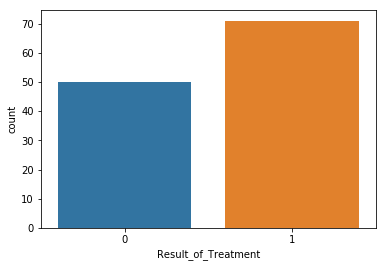

In [63]:
sns.countplot(x=dataset_resampled['Result_of_Treatment'],data=dataset)

# Histogram

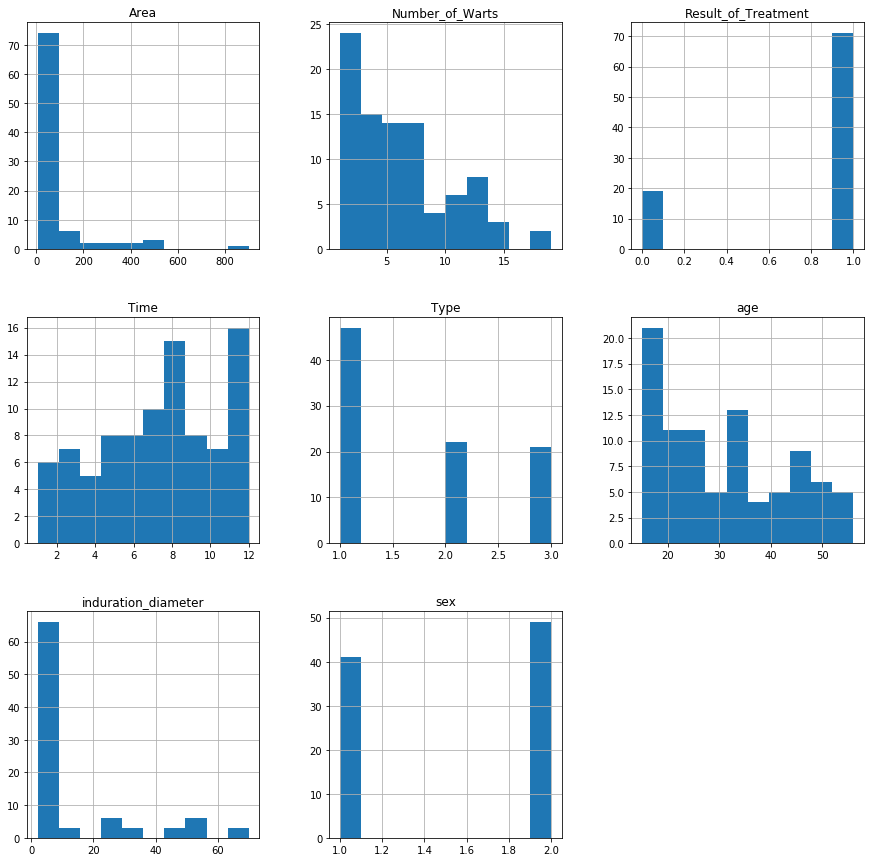

In [64]:
dataset.hist(figsize=(15,15))
plt.show()

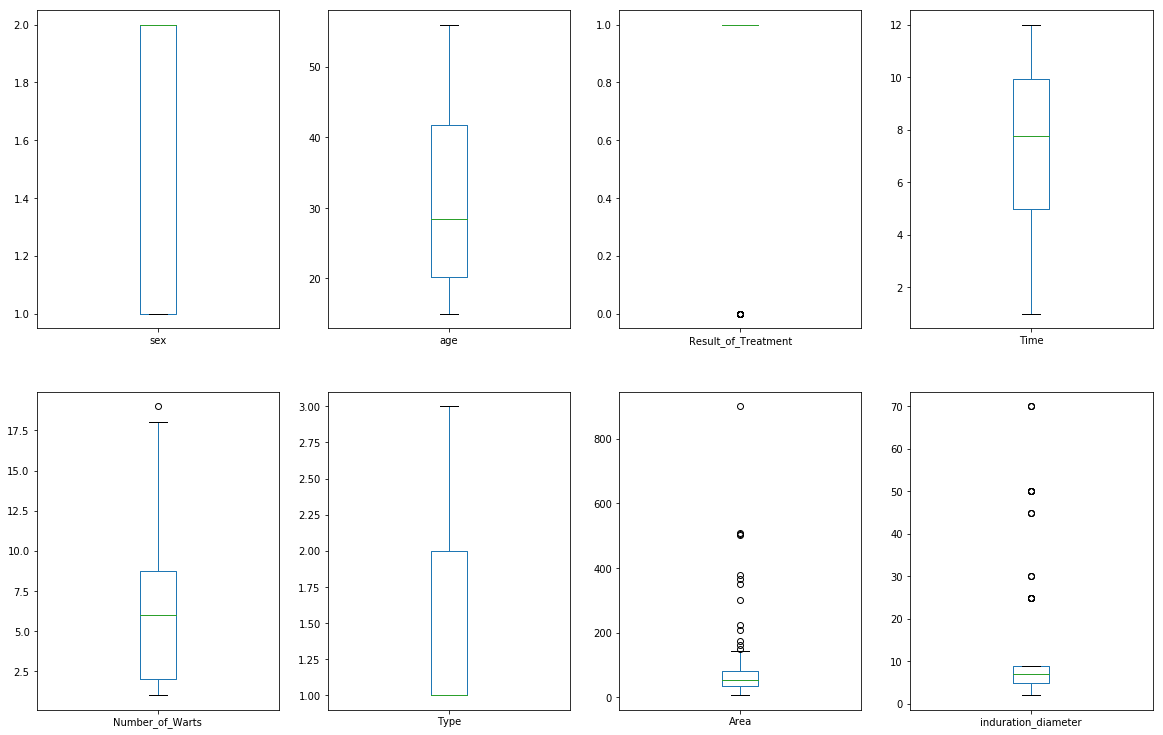

In [65]:
dataset.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, figsize=(20,55))
plt.show()

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(7)

In [67]:
# Memuat dataset immunotherapy
dataset = pd.read_csv("Immunotherapy1.csv", delimiter=",")
# Membaginya kedalam input (X) dan output (Y)
X = dataset.iloc[:,0:7].values
Y = dataset.iloc[:,2].values

In [68]:
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_test = sc.transform(X)

In [69]:
X

array([[  1.  ,  22.  ,   1.  ,   2.25,  14.  ,   3.  ,  51.  ],
       [  1.  ,  15.  ,   1.  ,   3.  ,   2.  ,   3.  , 900.  ],
       [  1.  ,  16.  ,   1.  ,  10.5 ,   2.  ,   1.  , 100.  ],
       [  1.  ,  27.  ,   1.  ,   4.5 ,   9.  ,   3.  ,  80.  ],
       [  1.  ,  20.  ,   1.  ,   8.  ,   6.  ,   1.  ,  45.  ],
       [  1.  ,  15.  ,   1.  ,   5.  ,   3.  ,   3.  ,  84.  ],
       [  1.  ,  35.  ,   1.  ,   9.75,   2.  ,   2.  ,   8.  ],
       [  2.  ,  28.  ,   1.  ,   7.5 ,   4.  ,   1.  ,   9.  ],
       [  2.  ,  19.  ,   1.  ,   6.  ,   2.  ,   1.  , 225.  ],
       [  2.  ,  32.  ,   0.  ,  12.  ,   6.  ,   3.  ,  35.  ],
       [  2.  ,  33.  ,   1.  ,   6.25,   2.  ,   1.  ,  30.  ],
       [  2.  ,  17.  ,   1.  ,   5.75,  12.  ,   3.  ,  25.  ],
       [  2.  ,  15.  ,   0.  ,   1.75,   1.  ,   2.  ,  49.  ],
       [  2.  ,  15.  ,   1.  ,   5.5 ,  12.  ,   1.  ,  48.  ],
       [  2.  ,  16.  ,   1.  ,  10.  ,   7.  ,   1.  , 143.  ],
       [  2.  ,  33.  ,  

In [70]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1], dtype=int64)

In [71]:
#converts a class vector (integers) to binary class matrix
from keras.utils.np_utils import to_categorical

y_categorical = to_categorical(Y)

In [72]:
y_categorical.shape

(90, 2)

In [73]:
model = Sequential()
model.add(Dense(units=15, input_dim=7, activation='relu'))
model.add(Dense(units=15, input_dim=7, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Relu adalah rectified linear unit, merupakan fungsi aktivasi yang didenifisikan sebagai bagian positif dari argumennya, dimana x adalah input ke neuron.
sigmoid adalah suatu fungsi matematika yang memiliki kurva berbentuk "S"

In [74]:
# Fit the model
history=model.fit(X_train, y_categorical, epochs=100, batch_size=10, validation_split=0.2)

Train on 72 samples, validate on 18 samples
Epoch 1/100
72/72 [==============================] - 1s 8ms/step - loss: 0.7608 - acc: 0.3333 - val_loss: 0.7314 - val_acc: 0.4722
Epoch 2/100
72/72 [==============================] - 0s 341us/step - loss: 0.7322 - acc: 0.4236 - val_loss: 0.7092 - val_acc: 0.5556
Epoch 3/100
72/72 [==============================] - 0s 261us/step - loss: 0.7068 - acc: 0.4722 - val_loss: 0.6886 - val_acc: 0.5833
Epoch 4/100
72/72 [==============================] - 0s 369us/step - loss: 0.6828 - acc: 0.5486 - val_loss: 0.6698 - val_acc: 0.5833
Epoch 5/100
72/72 [==============================] - 0s 299us/step - loss: 0.6620 - acc: 0.5903 - val_loss: 0.6519 - val_acc: 0.6667
Epoch 6/100
72/72 [==============================] - 0s 323us/step - loss: 0.6424 - acc: 0.6597 - val_loss: 0.6339 - val_acc: 0.6944
Epoch 7/100
72/72 [==============================] - 0s 276us/step - loss: 0.6224 - acc: 0.7361 - val_loss: 0.6153 - val_acc: 0.7500
Epoch 8/100
72/72 [========

In [75]:
predict = model.predict(X_train)
predict

array([[6.49840920e-04, 9.99781311e-01],
       [6.42925384e-04, 9.99255121e-01],
       [2.26933579e-03, 9.99390364e-01],
       [2.12871772e-03, 9.99297738e-01],
       [4.12822235e-03, 9.98616576e-01],
       [1.67613791e-03, 9.99574840e-01],
       [6.83752540e-03, 9.98159349e-01],
       [4.55458090e-03, 9.97653782e-01],
       [2.07567867e-03, 9.99306917e-01],
       [9.90472972e-01, 1.36484089e-03],
       [2.34853802e-03, 9.98904228e-01],
       [1.41600287e-03, 9.99503970e-01],
       [9.51320708e-01, 6.91158045e-03],
       [4.27071378e-03, 9.97105539e-01],
       [6.96177734e-03, 9.96523917e-01],
       [9.32441000e-03, 9.97188151e-01],
       [7.42356107e-03, 9.96501446e-01],
       [6.53943233e-03, 9.96383429e-01],
       [6.21293113e-03, 9.94917393e-01],
       [3.11053265e-03, 9.98453856e-01],
       [1.92993111e-03, 9.99447525e-01],
       [1.46086642e-03, 9.99366939e-01],
       [9.89818990e-01, 1.17514236e-03],
       [5.32603031e-03, 9.98266041e-01],
       [4.870097

In [78]:
# evaluate the model
scores = model.evaluate(X_train, y_categorical)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

90/90 [==============================] - 0s 101us/step

acc: 100.00%


In [ ]:
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_categorical.argmax(axis=1), predict.argmax(axis=1))

Confusion_Matrix

In [81]:
accuracy = ((19+71) / (19+71+0+0))
print("\n%s: %.2f%%" % ("Accuracy", accuracy*100))


Accuracy: 100.00%


In [82]:
recall = ((19) / (19+0))
print("\n%s: %.2f%%" % ("Recall", recall*100))


Recall: 100.00%


In [83]:
precission =((19 / (19+0)))
print("\n%s: %.2f%%" % ("Precission", precission*100))


Precission: 100.00%


In [84]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [85]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1 )

<Figure size 432x288 with 0 Axes>

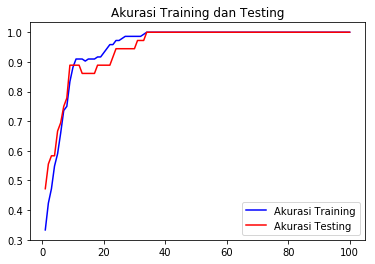

<Figure size 432x288 with 0 Axes>

In [86]:
plt.plot(epochs, acc, 'b' , color='blue', label='Akurasi Training')
plt.plot(epochs, val_acc, 'r', color='red', label='Akurasi Testing')
plt.title('Akurasi Training dan Testing')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

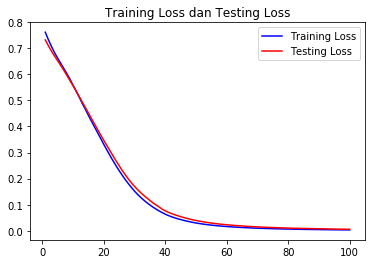

<Figure size 432x288 with 0 Axes>

In [87]:
plt.plot(epochs, loss, 'b' , color='blue', label='Training Loss')
plt.plot(epochs, val_loss, 'r', color='red', label='Testing Loss')
plt.title('Training Loss dan Testing Loss')
plt.legend()
plt.figure()

# Referensi

Dataset = https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset#